___

# ***TCN model***

___


In [ ]:
pip install keras-tcn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tcn import TCN, tcn_full_summary

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# Data

In [ ]:
df_bret=pd.read_csv("/content/drive/MyDrive/Projet_API_Consommation_Electrique/FICHIERS/Data_Bretagne.csv",sep=';',index_col=0,header=[0,1])
df_bret.index=pd.to_datetime(df_bret.index)
df_bret.head()

ff                          precip                          hu  \
            min      mean   max      sum    min      mean  max    sum   min   
datetime                                                                      
2016-01-01  0.0  6.672689  25.2  62082.7    0.0  0.016023  2.1  143.6  68.0   
2016-01-02  0.0  9.081779  23.6  86376.8    0.0  0.034908  1.1  325.1  58.0   
2016-01-03  0.0  6.787111  21.5  63982.1    0.0  0.084818  2.9  774.3  64.0   
2016-01-04  0.0  7.008276  19.0  66389.4    0.0  0.025511  2.0  234.7  58.0   
2016-01-05  0.0  6.294020  18.9  59358.9    0.0  0.033865  2.3  307.9  68.0   

                                             t                                  
                 mean    max       sum     min        mean     max         sum  
datetime                                                                        
2016-01-01  88.979694  100.0  815054.0  272.95  281.763440  286.95  2660410.40  
2016-01-02  81.360695  100.0  754295.0  276.75  282.275044  285.85  2752463.95  
2016-01-03  88.042041  100.0  793699.0  277.75  282.324692  286.25  2680672.95  
2016-01-04  81.663568  100.0  737912.0  277.65  281.425969  285.45  2678330.95  
2016-01-05  87.446377  100.0  794188.0  277.55  281.307730  285.25  2689301.90

In [ ]:
df_bret.describe()

ff                                           precip  \
               min         mean          max            sum     min   
count  1096.000000  1096.000000  1096.000000    1096.000000  1096.0   
mean      0.111679     3.940173    12.933120   37028.389325     0.0   
std       0.411002     1.617102     4.442954   15123.057151     0.0   
min       0.000000     1.303344     5.000000   12199.300000     0.0   
25%       0.000000     2.698235     9.800000   25385.000000     0.0   
50%       0.000000     3.611731    12.000000   33866.850000     0.0   
75%       0.000000     4.781237    15.300000   45159.450000     0.0   
max       3.400000    11.292535    37.900000  108306.700000     0.0   

                                                       hu               \
              mean          max          sum          min         mean   
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean      0.009378     1.437682    87.483485    47.990876    82.176169   
std       0.015379     2.176112   142.995858    15.223687     7.657903   
min       0.000000     0.000000     0.000000     1.000000    52.653450   
25%       0.000427     0.200000     4.000000    38.000000    77.423701   
50%       0.002444     0.800000    22.750000    48.000000    82.487034   
75%       0.011789     1.800000   109.075000    58.250000    87.840340   
max       0.105696    32.500000   963.000000    86.000000    97.447104   

                                             t                            \
               max            sum          min         mean          max   
count  1096.000000    1096.000000  1096.000000  1096.000000  1096.000000   
mean     99.695255  764751.894161   277.975821   285.109530   292.248723   
std       1.259200   74708.233130     5.559063     4.840826     7.100313   
min      79.000000  432481.000000   233.150000   269.957702   274.950000   
25%     100.000000  719964.250000   273.850000   281.501341   286.650000   
50%     100.000000  768957.000000   278.300000   284.717972   291.350000   
75%     100.000000  818987.250000   282.150000   289.045599   296.850000   
max     100.000000  943568.000000   289.350000   298.804172   335.050000   

                     
                sum  
count  1.096000e+03  
mean   2.680699e+06  
std    8.773530e+04  
min    1.767213e+06  
25%    2.622453e+06  
50%    2.672336e+06  
75%    2.734624e+06  
max    2.902303e+06

In [ ]:
df_bret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (ff, min)       1096 non-null   float64
 1   (ff, mean)      1096 non-null   float64
 2   (ff, max)       1096 non-null   float64
 3   (ff, sum)       1096 non-null   float64
 4   (precip, min)   1096 non-null   float64
 5   (precip, mean)  1096 non-null   float64
 6   (precip, max)   1096 non-null   float64
 7   (precip, sum)   1096 non-null   float64
 8   (hu, min)       1096 non-null   float64
 9   (hu, mean)      1096 non-null   float64
 10  (hu, max)       1096 non-null   float64
 11  (hu, sum)       1096 non-null   float64
 12  (t, min)        1096 non-null   float64
 13  (t, mean)       1096 non-null   float64
 14  (t, max)        1096 non-null   float64
 15  (t, sum)        1096 non-null   float64
dtypes: float64(16)
memory usage: 145.6 KB


In [ ]:
df_co2=pd.read_csv("/content/drive/MyDrive/Projet_API_Consommation_Electrique/FICHIERS/Conso_Bretagne.csv",index_col=0,sep=";")
df_co2.index=pd.to_datetime(df_co2.index)
df_co2.head()

,consommation,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques
datetime,,,,,,,,,
2014-01-01,133074.0,3702.0,0.0,26541.0,40.0,4978.0,-283.0,1503.0,96590.0
2014-01-02,144490.0,4031.0,0.0,18435.0,394.0,4968.0,-52.0,1430.0,115290.0
2014-01-03,146521.0,4091.0,0.0,25486.0,421.0,4750.0,-52.0,1446.0,110378.0
2014-01-04,142139.0,4032.0,0.0,17754.0,134.0,5338.0,-86.0,1455.0,113525.0
2014-01-05,138288.0,4064.0,0.0,19678.0,85.0,4786.0,-151.0,1403.0,108427.0


In [ ]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2014-01-01 to 2019-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consommation   2191 non-null   float64
 1   thermique      2191 non-null   float64
 2   nucleaire      2191 non-null   float64
 3   eolien         2191 non-null   float64
 4   solaire        2191 non-null   float64
 5   hydraulique    2191 non-null   float64
 6   pompage        2191 non-null   float64
 7   bioenergies    2191 non-null   float64
 8   ech_physiques  2191 non-null   float64
dtypes: float64(9)
memory usage: 171.2 KB


In [ ]:
df_Y=df_co2[(df_co2.index.year>=2016)&(df_co2.index.year<=2018)]

In [ ]:
df_Y.describe()

,consommation,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques
count,1096.000000,1096.000000,1096.0,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,122788.022810,3981.398723,0.0,8812.179745,1147.860401,3173.838504,-304.632299,1915.235401,104063.448905
std,29837.648762,4772.660142,0.0,7424.821603,665.869057,1187.514926,148.791487,251.839768,25197.296247
min,75007.000000,0.000000,0.0,158.000000,29.000000,412.000000,-683.000000,928.000000,45164.000000
25%,101421.000000,48.000000,0.0,3164.750000,593.000000,2218.250000,-422.000000,1753.500000,86936.000000
50%,114041.000000,195.000000,0.0,6458.000000,1112.500000,3342.000000,-306.500000,1919.500000,97756.500000
75%,146904.250000,9064.000000,0.0,12282.750000,1665.750000,4169.000000,-189.000000,2077.250000,121467.000000
max,223443.000000,24791.000000,0.0,39156.000000,2774.000000,5779.000000,-43.000000,2804.000000,184044.000000


In [ ]:
df_Y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consommation   1096 non-null   float64
 1   thermique      1096 non-null   float64
 2   nucleaire      1096 non-null   float64
 3   eolien         1096 non-null   float64
 4   solaire        1096 non-null   float64
 5   hydraulique    1096 non-null   float64
 6   pompage        1096 non-null   float64
 7   bioenergies    1096 non-null   float64
 8   ech_physiques  1096 non-null   float64
dtypes: float64(9)
memory usage: 85.6 KB


In [ ]:
df=pd.concat([df_bret,df_Y],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (ff, min)       1096 non-null   float64
 1   (ff, mean)      1096 non-null   float64
 2   (ff, max)       1096 non-null   float64
 3   (ff, sum)       1096 non-null   float64
 4   (precip, min)   1096 non-null   float64
 5   (precip, mean)  1096 non-null   float64
 6   (precip, max)   1096 non-null   float64
 7   (precip, sum)   1096 non-null   float64
 8   (hu, min)       1096 non-null   float64
 9   (hu, mean)      1096 non-null   float64
 10  (hu, max)       1096 non-null   float64
 11  (hu, sum)       1096 non-null   float64
 12  (t, min)        1096 non-null   float64
 13  (t, mean)       1096 non-null   float64
 14  (t, max)        1096 non-null   float64
 15  (t, sum)        1096 non-null   float64
 16  consommation    1096 non-null   float64
 17  thermique      

In [ ]:
df.isna().sum()

(ff, min)         0
(ff, mean)        0
(ff, max)         0
(ff, sum)         0
(precip, min)     0
(precip, mean)    0
(precip, max)     0
(precip, sum)     0
(hu, min)         0
(hu, mean)        0
(hu, max)         0
(hu, sum)         0
(t, min)          0
(t, mean)         0
(t, max)          0
(t, sum)          0
consommation      0
thermique         0
nucleaire         0
eolien            0
solaire           0
hydraulique       0
pompage           0
bioenergies       0
ech_physiques     0
dtype: int64

# Relation entre Consommation et météo

In [ ]:
cols=df.columns
print(cols)

Index([     ('ff', 'min'),     ('ff', 'mean'),      ('ff', 'max'),
            ('ff', 'sum'),  ('precip', 'min'), ('precip', 'mean'),
        ('precip', 'max'),  ('precip', 'sum'),      ('hu', 'min'),
           ('hu', 'mean'),      ('hu', 'max'),      ('hu', 'sum'),
             ('t', 'min'),      ('t', 'mean'),       ('t', 'max'),
             ('t', 'sum'),     'consommation',        'thermique',
              'nucleaire',           'eolien',          'solaire',
            'hydraulique',          'pompage',      'bioenergies',
          'ech_physiques'],
      dtype='object')


In [ ]:
# On garde la somme des précipitations, pas les autres sommes, ni les autres grandeurs relatives aux précipitations
# Supprimons le nucléaire, non produit localement !
sup=[0,1,2,3,4,5,6,11,12,14,15,18]
cols[sup]

Index([     ('ff', 'min'),     ('ff', 'mean'),      ('ff', 'max'),
            ('ff', 'sum'),  ('precip', 'min'), ('precip', 'mean'),
        ('precip', 'max'),      ('hu', 'sum'),       ('t', 'min'),
             ('t', 'max'),       ('t', 'sum'),        'nucleaire'],
      dtype='object')

In [ ]:
corr_mat= df.loc[:,cols[~(cols.isin(cols[sup]))]].corr()
corr_mat

,"(precip, sum)","(hu, min)","(hu, mean)","(hu, max)","(t, mean)",consommation,thermique,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques
"(precip, sum)",1.000000,0.333306,0.328788,0.065652,-0.121150,0.142098,0.176834,0.490806,-0.403828,0.041023,0.054252,-0.045402,-0.000971
"(hu, min)",0.333306,1.000000,0.705500,0.124767,-0.240240,0.280108,0.332991,0.239213,-0.696926,0.085781,0.030448,-0.140272,0.213732
"(hu, mean)",0.328788,0.705500,1.000000,0.342451,-0.139642,0.200021,0.269898,0.030671,-0.721081,0.034124,0.024164,-0.089291,0.194897
"(hu, max)",0.065652,0.124767,0.342451,1.000000,0.203274,-0.169489,-0.132643,-0.218836,-0.060323,0.001843,-0.060013,0.034476,-0.109568
"(t, mean)",-0.121150,-0.240240,-0.139642,0.203274,1.000000,-0.846713,-0.730442,-0.254966,0.537167,-0.049741,-0.135890,0.303908,-0.803223
consommation,0.142098,0.280108,0.200021,-0.169489,-0.846713,1.000000,0.844305,0.316765,-0.600625,0.046263,0.159779,-0.280114,0.946403
thermique,0.176834,0.332991,0.269898,-0.132643,-0.730442,0.844305,1.000000,0.389534,-0.634242,0.073726,0.114918,-0.074468,0.708906
eolien,0.490806,0.239213,0.030671,-0.218836,-0.254966,0.316765,0.389534,1.000000,-0.371633,0.083874,0.073055,-0.055876,0.012649
solaire,-0.403828,-0.696926,-0.721081,-0.060323,0.537167,-0.600625,-0.634242,-0.371633,1.000000,-0.091527,-0.100535,0.251511,-0.505631
hydraulique,0.041023,0.085781,0.034124,0.001843,-0.049741,0.046263,0.073726,0.083874,-0.091527,1.000000,0.562183,0.022952,-0.032059


In [ ]:
corr_mat.style.background_gradient(cmap='RdBu_r').format(precision=2)

,"('precip', 'sum')","('hu', 'min')","('hu', 'mean')","('hu', 'max')","('t', 'mean')",consommation,thermique,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques
"('precip', 'sum')",1.00,0.33,0.33,0.07,-0.12,0.14,0.18,0.49,-0.40,0.04,0.05,-0.05,-0.00
"('hu', 'min')",0.33,1.00,0.71,0.12,-0.24,0.28,0.33,0.24,-0.70,0.09,0.03,-0.14,0.21
"('hu', 'mean')",0.33,0.71,1.00,0.34,-0.14,0.20,0.27,0.03,-0.72,0.03,0.02,-0.09,0.19
"('hu', 'max')",0.07,0.12,0.34,1.00,0.20,-0.17,-0.13,-0.22,-0.06,0.00,-0.06,0.03,-0.11
"('t', 'mean')",-0.12,-0.24,-0.14,0.20,1.00,-0.85,-0.73,-0.25,0.54,-0.05,-0.14,0.30,-0.80
consommation,0.14,0.28,0.20,-0.17,-0.85,1.00,0.84,0.32,-0.60,0.05,0.16,-0.28,0.95
thermique,0.18,0.33,0.27,-0.13,-0.73,0.84,1.00,0.39,-0.63,0.07,0.11,-0.07,0.71
eolien,0.49,0.24,0.03,-0.22,-0.25,0.32,0.39,1.00,-0.37,0.08,0.07,-0.06,0.01
solaire,-0.40,-0.70,-0.72,-0.06,0.54,-0.60,-0.63,-0.37,1.00,-0.09,-0.10,0.25,-0.51
hydraulique,0.04,0.09,0.03,0.00,-0.05,0.05,0.07,0.08,-0.09,1.00,0.56,0.02,-0.03


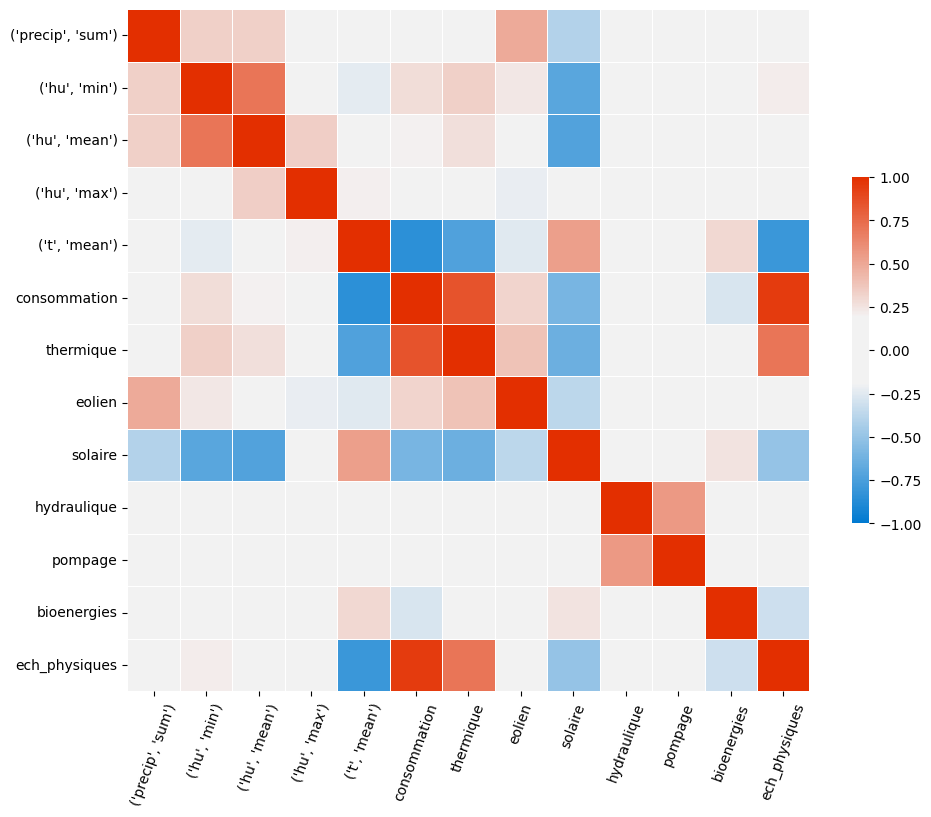

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(corr_mat, annot = True)
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(250, 15,s=100, l=50, sep=50, as_cmap=True)
#cmap=sns.color_palette("coolwarm",as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, cmap=cmap, center=0,
            square=True, linewidths=.5, vmin=-1, vmax=1,cbar_kws={"shrink": .5})
plt.xticks(rotation=70)
plt.show()

In [ ]:
# Ajoutons le mois et le jour de la semaine dans les données
df["month"]=df.index.month
df["day"]=df.index.day_of_week

In [ ]:
df.head()

,"(ff, min)","(ff, mean)","(ff, max)","(ff, sum)","(precip, min)","(precip, mean)","(precip, max)","(precip, sum)","(hu, min)","(hu, mean)",...,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,6.672689,25.2,62082.7,0.0,0.016023,2.1,143.6,68.0,88.979694,...,6738.0,0.0,18746.0,215.0,2584.0,-480.0,1763.0,95931.0,1,4
2016-01-02,0.0,9.081779,23.6,86376.8,0.0,0.034908,1.1,325.1,58.0,81.360695,...,6898.0,0.0,28348.0,236.0,1959.0,-476.0,1698.0,92199.0,1,5
2016-01-03,0.0,6.787111,21.5,63982.1,0.0,0.084818,2.9,774.3,64.0,88.042041,...,7204.0,0.0,20514.0,93.0,1332.0,-321.0,1678.0,96558.0,1,6
2016-01-04,0.0,7.008276,19.0,66389.4,0.0,0.025511,2.0,234.7,58.0,81.663568,...,7173.0,0.0,20383.0,514.0,1215.0,-250.0,1658.0,120051.0,1,0
2016-01-05,0.0,6.294020,18.9,59358.9,0.0,0.033865,2.3,307.9,68.0,87.446377,...,7030.0,0.0,17422.0,258.0,1652.0,-315.0,1645.0,130090.0,1,1


In [ ]:
df=df.drop(cols[sup],axis=1)
df.head()

,"(precip, sum)","(hu, min)","(hu, mean)","(hu, max)","(t, mean)",consommation,thermique,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques,month,day
datetime,,,,,,,,,,,,,,,
2016-01-01,143.6,68.0,88.979694,100.0,281.763440,125505.0,6738.0,18746.0,215.0,2584.0,-480.0,1763.0,95931.0,1,4
2016-01-02,325.1,58.0,81.360695,100.0,282.275044,130868.0,6898.0,28348.0,236.0,1959.0,-476.0,1698.0,92199.0,1,5
2016-01-03,774.3,64.0,88.042041,100.0,282.324692,127065.0,7204.0,20514.0,93.0,1332.0,-321.0,1678.0,96558.0,1,6
2016-01-04,234.7,58.0,81.663568,100.0,281.425969,150748.0,7173.0,20383.0,514.0,1215.0,-250.0,1658.0,120051.0,1,0
2016-01-05,307.9,68.0,87.446377,100.0,281.307730,157780.0,7030.0,17422.0,258.0,1652.0,-315.0,1645.0,130090.0,1,1


In [ ]:
Ycols=df.columns
Ycols=Ycols[5:-2]
print(Ycols)

Index(['consommation', 'thermique', 'eolien', 'solaire', 'hydraulique',
       'pompage', 'bioenergies', 'ech_physiques'],
      dtype='object')


In [ ]:
df.columns

Index([('precip', 'sum'),     ('hu', 'min'),    ('hu', 'mean'),
           ('hu', 'max'),     ('t', 'mean'),    'consommation',
             'thermique',          'eolien',         'solaire',
           'hydraulique',         'pompage',     'bioenergies',
         'ech_physiques',           'month',             'day'],
      dtype='object')

In [ ]:
Z=df.drop(df.columns[0:4],axis=1)
Z.columns

Index([  ('t', 'mean'),  'consommation',     'thermique',        'eolien',
             'solaire',   'hydraulique',       'pompage',   'bioenergies',
       'ech_physiques',         'month',           'day'],
      dtype='object')

In [ ]:
y=df.loc[:,Ycols]
X=df.drop(Ycols,axis=1)
X=X.drop(X.columns[0:4],axis=1)
X.head()

,"(t, mean)",month,day
datetime,,,
2016-01-01,281.763440,1,4
2016-01-02,282.275044,1,5
2016-01-03,282.324692,1,6
2016-01-04,281.425969,1,0
2016-01-05,281.307730,1,1


In [ ]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
X_scaled= RS.fit_transform(X.to_numpy())

# Séparation des données

In [ ]:
# Nous allons découper les données par séquence de 14 jours
batch_size, timesteps, input_dim = 64, 14, 3
output_timesteps, output_dim = 14, 8


In [ ]:
# Nous allons découper les données par paquets de 14 jours avec des recoupements
import random
indexes=random.sample(range(len(X)-14),int(len(X)*2/3))

In [ ]:
from sklearn.model_selection import train_test_split
ind_train, ind_test = train_test_split(indexes,train_size=0.7,test_size=0.15,random_state=42)
print(len(ind_train),len(ind_test),len(indexes))

510 110 730


In [ ]:
ind_val=[ind for ind in indexes if (ind not in ind_test) & (ind not in ind_train)]
ind_val

In [ ]:
y_train=np.zeros([len(ind_train),output_timesteps,output_dim])

In [ ]:
X_train=np.zeros([len(ind_train),timesteps,input_dim])
y_train=np.zeros([len(ind_train),output_timesteps,output_dim])
for j,k in enumerate(ind_train):
    X_train[j,:,:]=X_scaled[k:k+timesteps,:]
    y_train[j,:,:]=y.iloc[k:k+output_timesteps,:].to_numpy()

In [ ]:
X_test=np.zeros([len(ind_test),timesteps,input_dim])
y_test=np.zeros([len(ind_test),output_timesteps,output_dim])
for j,k in enumerate(ind_test):
    X_test[j,:,:]=X_scaled[k:k+timesteps,:]
    y_test[j,:,:]=y.iloc[k:k+output_timesteps,:].to_numpy()

In [ ]:
X_val=np.zeros([len(ind_val),timesteps,input_dim])
y_val=np.zeros([len(ind_val),output_timesteps,output_dim])
for j,k in enumerate(ind_val):
    X_val[j,:,:]=X_scaled[k:k+timesteps,:]
    y_val[j,:,:]=y.iloc[k:k+output_timesteps,:].to_numpy()

In [ ]:
print(X_train.shape,y_train.shape)

(510, 14, 3) (510, 14, 8)


In [ ]:
import keras

In [ ]:
inputs=keras.layers.Input(shape=(timesteps, input_dim), name="Input")
layer_tcn=TCN(nb_filters=32,kernel_size=6, nb_stacks=1, return_sequences=True, dilations=[1, 2, 4, 8],name='TCN')
layer_Dense=keras.layers.Dense(output_dim, name='Dense')
x=layer_tcn(inputs)
outputs=layer_Dense(x)
model = keras.models.Model(inputs = inputs, outputs = outputs, name='Model_0_Bret')

model.summary()


Model: "Model_0_Bret"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 14, 3)]           0         
                                                                 
 TCN (TCN)                   (None, 14, 32)            43968     
                                                                 
 Dense (Dense)               (None, 14, 8)             264       
                                                                 
Total params: 44,232
Trainable params: 44,232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 model.compile(optimizer="adam", loss="mae",
                  metrics=keras.metrics.MeanAbsoluteError())

In [ ]:
nb_epochs=1000
training_history=model.fit(X_train, y_train, batch_size=batch_size,epochs=nb_epochs,validation_split=0.2)

Epoch 1/1000
7/7 [==============================] - 4s 111ms/step - loss: 31089.6406 - mean_absolute_error: 31089.6406 - val_loss: 30991.7012 - val_mean_absolute_error: 30991.7012
Epoch 2/1000
7/7 [==============================] - 0s 34ms/step - loss: 31087.6914 - mean_absolute_error: 31087.6953 - val_loss: 30988.6367 - val_mean_absolute_error: 30988.6387
Epoch 3/1000
7/7 [==============================] - 0s 32ms/step - loss: 31083.0566 - mean_absolute_error: 31083.0566 - val_loss: 30980.2148 - val_mean_absolute_error: 30980.2188
Epoch 4/1000
7/7 [==============================] - 0s 33ms/step - loss: 31069.8496 - mean_absolute_error: 31069.8516 - val_loss: 30954.6133 - val_mean_absolute_error: 30954.6113
Epoch 5/1000
7/7 [==============================] - 0s 33ms/step - loss: 31029.5684 - mean_absolute_error: 31029.5684 - val_loss: 30876.4434 - val_mean_absolute_error: 30876.4434
Epoch 6/1000
7/7 [==============================] - 0s 35ms/step - loss: 30911.5000 - mean_absolute_erro

In [ ]:
train_acc = training_history.history['mean_absolute_error']
val_acc = training_history.history['val_mean_absolute_error']
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

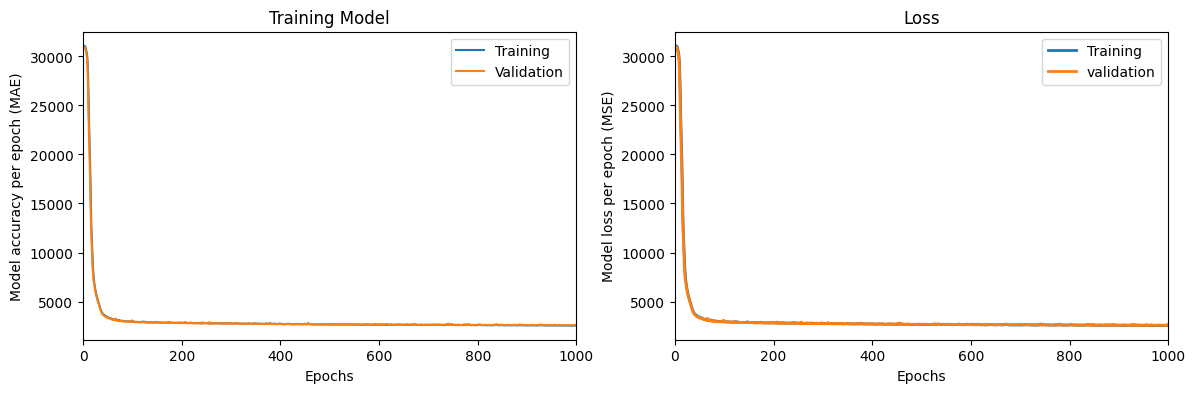

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.xlabel("Epochs")
plt.xlim([0,nb_epochs])
#plt.ylim(1500,5000)
plt.ylabel("Model accuracy per epoch (MAE)")
plt.legend()
plt.title("Training Model");
plt.subplot(1, 2, 2)
plt.plot(train_loss, lw=2, label='Training')
plt.plot(val_loss, lw=2, label='validation')
plt.xlim([0,nb_epochs])
#plt.ylim(1500,5000)
plt.xlabel("Epochs")
plt.ylabel("Model loss per epoch (MSE)")
plt.title("Loss");
plt.legend(loc='upper right');

In [ ]:
model.save('my_model.keras')

In [ ]:
y_pred=model.predict(X_test)

4/4 [==============================] - 1s 13ms/step


In [ ]:
y_pred=reloaded_model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
from tensorflow.keras.models import model_from_json

# get model as json string and save to file
model_as_json = model.to_json()
with open('model.json', "w") as json_file:
    json_file.write(model_as_json)
# save weights to file (for this format, need h5py installed)
model.save_weights('weights.h5')

# load model from file
loaded_json = open('model.json', 'r').read()
reloaded_model = model_from_json(loaded_json, custom_objects={'TCN': TCN})
tcn_full_summary(model, expand_residual_blocks=False)

# restore weights
reloaded_model.load_weights('weights.h5')

Use tensorboard instead. Example in keras-tcn/tasks/tcn_tensorboard.py.


In [ ]:
reloaded_model.summary()

NameError: ignored

In [ ]:
import numpy as np
np.savez('bret.npz', arr=X_test)

In [ ]:
X_test.shape,predict_test.shape

((110, 14, 3), (110, 14, 8))

In [ ]:
predict_test[:,:,0].shape

(110, 14)

In [ ]:
df = pd.DataFrame(predict_test[:,:,0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,167198.484375,149117.656250,130594.742188,146073.437500,150508.250000,158403.062500,171669.312500,182183.000000,170275.906250,160841.281250,191741.906250,207796.937500,217654.062500,212800.500000
1,138179.750000,144636.734375,144094.437500,149278.468750,140723.843750,137081.000000,160155.828125,161512.046875,155047.468750,154950.734375,153724.281250,140132.812500,132302.687500,152755.531250
2,157958.281250,156662.562500,151490.734375,136871.968750,113483.843750,104709.570312,131074.750000,140424.328125,138632.765625,136855.640625,141221.078125,135957.750000,141930.656250,174795.687500
3,180001.062500,182097.796875,169297.828125,152960.203125,140890.125000,174148.656250,178622.250000,169472.062500,159969.093750,166481.203125,146429.640625,133973.578125,149107.437500,151510.281250
4,146488.343750,149438.734375,146778.031250,136096.421875,119076.085938,136076.812500,134858.656250,127405.195312,128966.242188,139893.187500,133721.781250,134287.187500,151013.234375,155834.828125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,103940.890625,93115.460938,119708.187500,124598.093750,128037.726562,130134.414062,130367.281250,108635.335938,93015.140625,110297.757812,119029.476562,120954.773438,125798.164062,125494.460938
106,116510.281250,115920.703125,115314.750000,112738.765625,103562.343750,88764.703125,80261.562500,101041.289062,104459.695312,104875.242188,106776.789062,104857.148438,87268.726562,78173.570312
107,102528.835938,103133.429688,104990.398438,103414.445312,99210.039062,85534.445312,77128.054688,97438.789062,100682.320312,100619.617188,100966.054688,100127.156250,84435.210938,75914.445312
108,177020.859375,169510.906250,156528.609375,182631.312500,187539.781250,186408.953125,186123.234375,168966.687500,145301.937500,125452.914062,145482.281250,149583.250000,146855.375000,151563.000000


In [ ]:
z = df.mean(axis=0)
z

0     123376.554688
1     123530.617188
2     123552.390625
3     122362.937500
4     120638.703125
5     120535.351562
6     122004.867188
7     122741.781250
8     121342.867188
9     121579.898438
10    121686.554688
11    121085.156250
12    120619.445312
13    122158.789062
dtype: float32

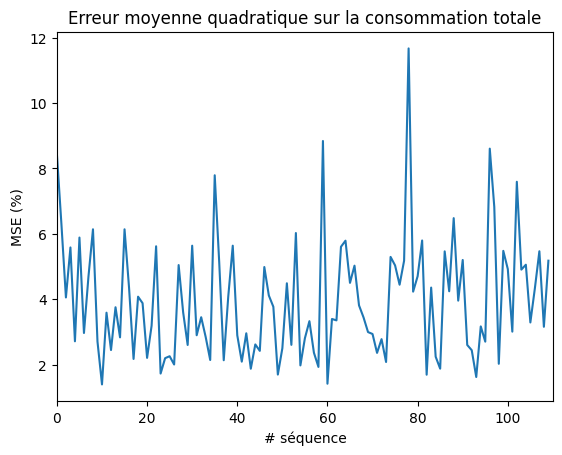

In [ ]:
from sklearn.metrics.pairwise import paired_euclidean_distances as PED
from sklearn.metrics import mean_squared_error as MSE
dist=PED(y_test[:,:,0], y_pred[:,:,0])
mse=MSE(y_test[:,:,0], y_pred[:,:,0])
norm=np.linalg.norm(y_test[:,:,0],axis=1)
err=[100*d/n for d,n in zip(dist,norm)]
plt.xlim([0,len(ind_test)])
plt.plot(err)
plt.xlabel("# séquence")
plt.ylabel('MSE (%)')
plt.title("Erreur moyenne quadratique sur la consommation totale");

In [ ]:
y_pred[0,:,0]

array([140597.94 , 131202.83 , 108373.96 ,  95728.8  , 115380.88 ,
       130534.26 , 135305.47 , 142242.12 , 134907.22 , 108625.266,
        99998.39 , 121458.59 , 117834.875, 115796.67 ], dtype=float32)